# Assignment on Classification

Do the following in the iris dataset

1. Read the dataset to python environment

2. Do the necessary pre-processing steps

3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)


Import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into the python environment.

In [2]:
df = pd.read_excel(r"C:\Users\ALFRED\Downloads\iris (3).xls")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Finding the missing values

In [7]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

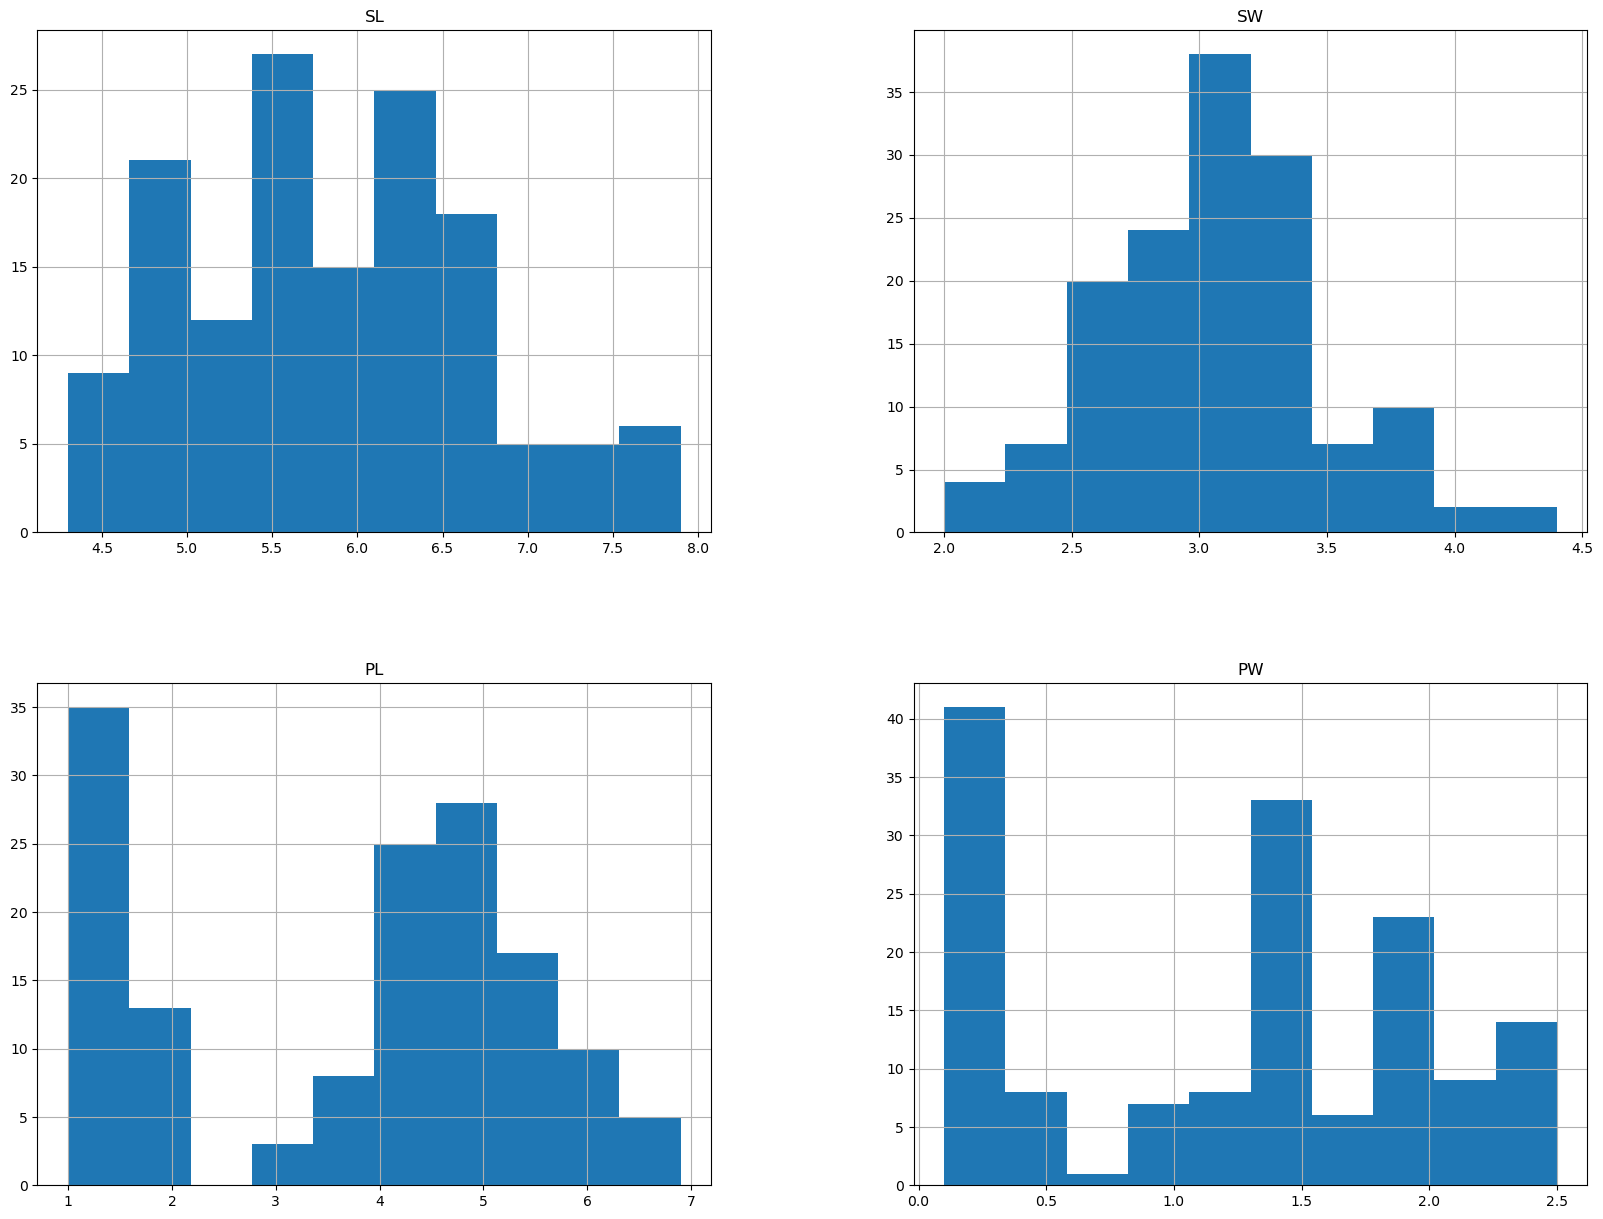

In [8]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [9]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Filling in the missing values with mean and median

In [10]:
for col in ['SL', 'SW']:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
df['PL'] = df['PL'].fillna(df['PL'].median())

In [12]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Looking for outliers

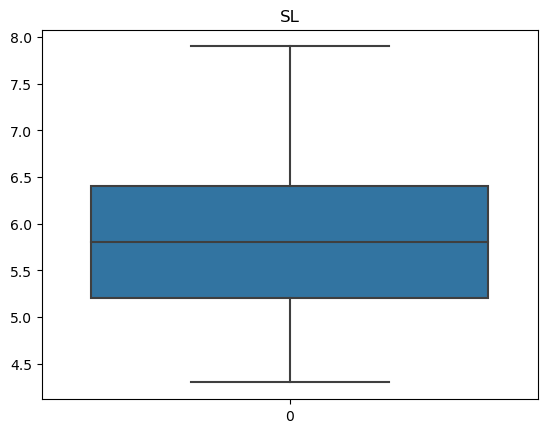

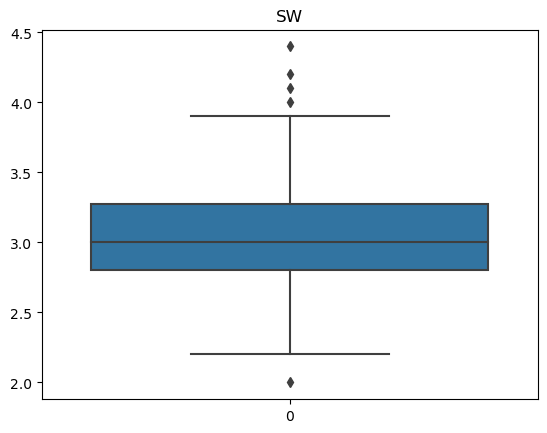

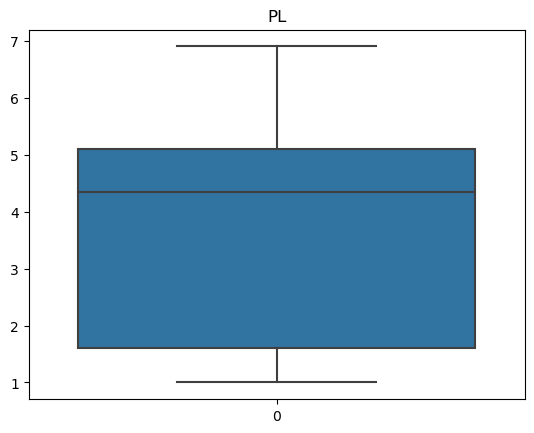

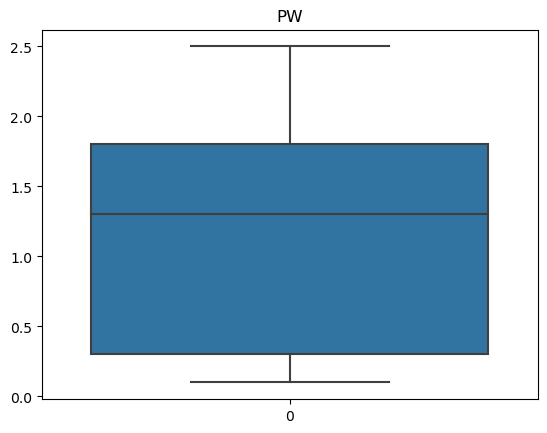

In [13]:
for i in df.columns:
    if df[i].dtype == float:
        plt.figure()
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [14]:
Q1 = np.percentile(df['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['SW'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_1964\544843948.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SW'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_1964\544843948.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['SW'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_1964\544843948.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher',

In [15]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [16]:
df['SW'].median()

3.0

In [17]:
IQR = Q3 - Q1
print(IQR)

0.4500000000000002


In [18]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [19]:
outliers = []
for x in df['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [20]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
ind1 = df['SW']> up_lim
df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [22]:
ind2 = df['SW']< low_lim
df.loc[ind2].index

Int64Index([60], dtype='int64')

Dropping the outliers.

In [23]:
df.drop([14, 15, 32, 33, 60], inplace = True)

In [24]:
df.shape

(145, 5)

Splitting the target and featured columns.

In [25]:
x = df.drop(['Classification'], axis = 1)
y = df['Classification']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_lr = logit_model.predict(x_test)

C:\Users\ALFRED\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_lr, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_lr, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [29]:
confusion_matrix(y_test,y_pred_lr)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

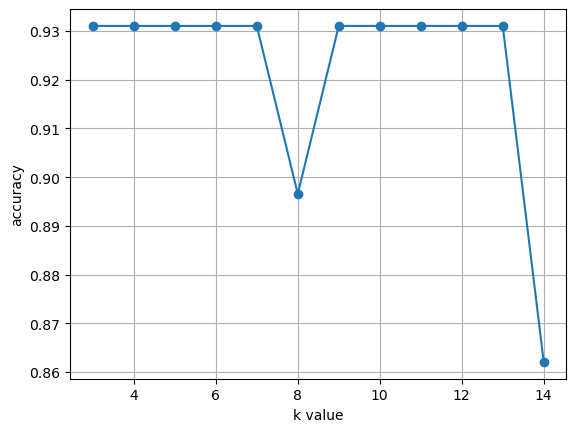

In [31]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [32]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [34]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

After doing both logistic regression and kNN, we get the same confusion matrix, accuracy, precision, recall and f1 score. So we try scaling

Standard Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std_scl = StandardScaler()

In [37]:
x = std_scl.fit_transform(x)

In [38]:
type(x)

numpy.ndarray

In [39]:
x = pd.DataFrame(x)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_lr = logit_model.predict(x_test)

In [41]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_lr, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_lr, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [42]:
confusion_matrix(y_test,y_pred_lr)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [43]:
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

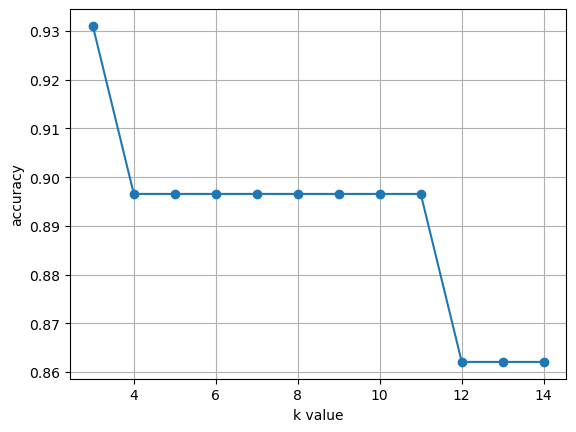

In [44]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [45]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [46]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [47]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

Standard scaling has no effect on the classification of given data. Now we try minmax scaling.

Min max Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
minmax = MinMaxScaler()

In [50]:
x = minmax.fit_transform(x)

In [51]:
x = pd.DataFrame(x)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_lr = logit_model.predict(x_test)

In [53]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_lr, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_lr, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9435736677115988
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [54]:
confusion_matrix(y_test,y_pred_lr)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]], dtype=int64)

In [55]:
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

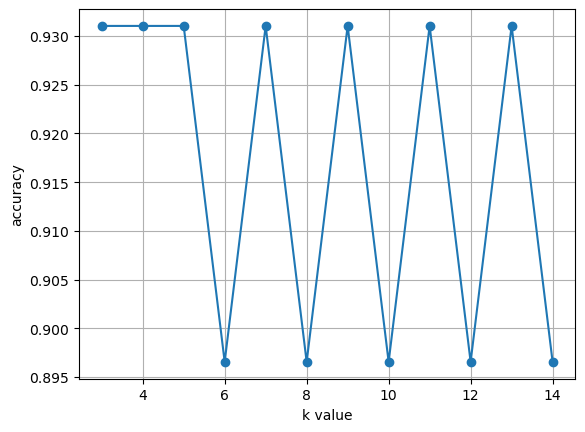

In [56]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [58]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


In [59]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In min max scaling while doing logistic regression, there is a slight change in confusion matrix, but other than that, there is not much change.

So, in conclusion, both kNN and Logistic regression has the same effect on the given dataset.